#### Prediction of Parkison's Disease : Logistic Regression, Decision Tree Classifier.

In this project, we will be trying to develop an end-to-end data science application. The aim of the project is to predict if a person has Parkison's Disease using biomedical voice measurements based on the following variables.

* name - ASCII subject name and recording number.
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude.
* NHR, HNR - Two measures of ratio of noise to tonal components in the voice.
* RPDE, D2 - Two nonlinear dynamical complexity measures.
* DFA - Signal fractal scaling exponent.
* spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation.


What we are trying to predict.

* status - Health status of the subject (one) - Parkinson's, (zero) - healthy.

In [32]:
#Import necessary libraries

# Analysis
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split



### Read Data

In [33]:
df = pd.read_csv('Parkisons.csv')

# Exploratory Data Analysis.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Our data has no Null values. The data types are correct too in regards to this data.

In [35]:
#Check for duplicates
df.duplicated().value_counts()

False    195
dtype: int64

Our data has no duplicates.

In [36]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


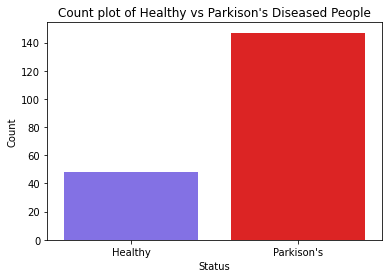

In [37]:
sns.countplot(x=df['status'],palette=['#765ef7','#fb0505'])
plt.title('Count plot of Healthy vs Parkison\'s Diseased People')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['Healthy',"Parkison's"]);

In [38]:
#Class count
df['status'].value_counts(normalize=True) * 100

1    75.384615
0    24.615385
Name: status, dtype: float64

We have a class imbalance as ~75% of data belongs to the Parkison's class.

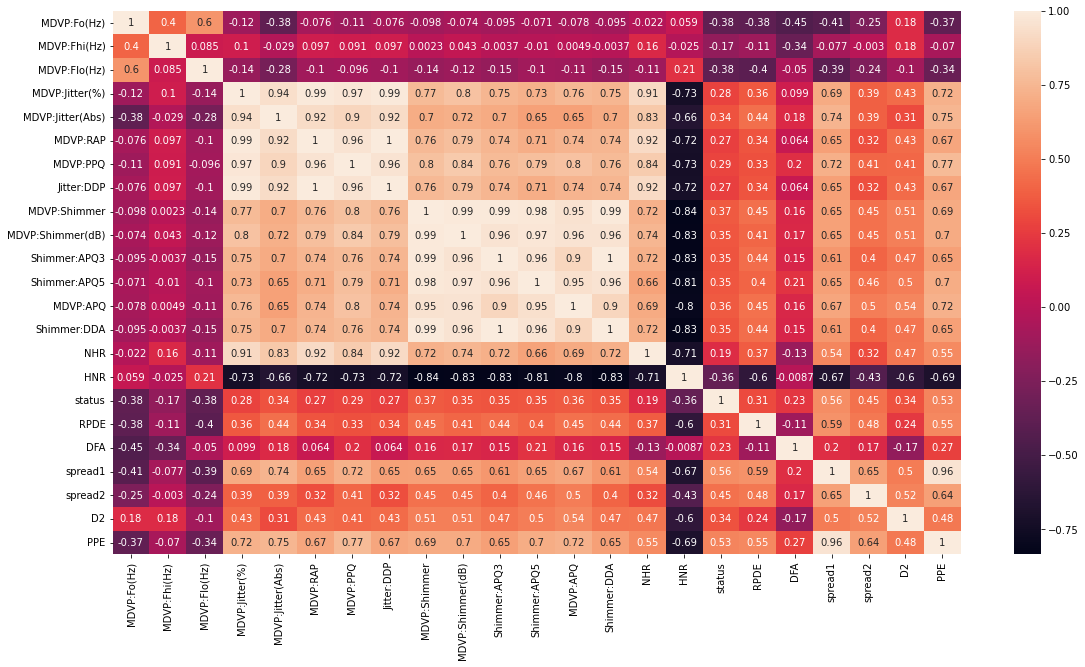

In [39]:
fig = plt.figure(figsize=(19,10))

sns.heatmap(
    df.corr(), 
    annot=True
);

Some of the measurements in our data is highly correlated this is because some measurements are derived from others.

We will not use all measurements for this project.

In [40]:
df_subset = df[['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)','NHR','HNR','spread1','spread2','D2','PPE','RPDE','DFA','status']]

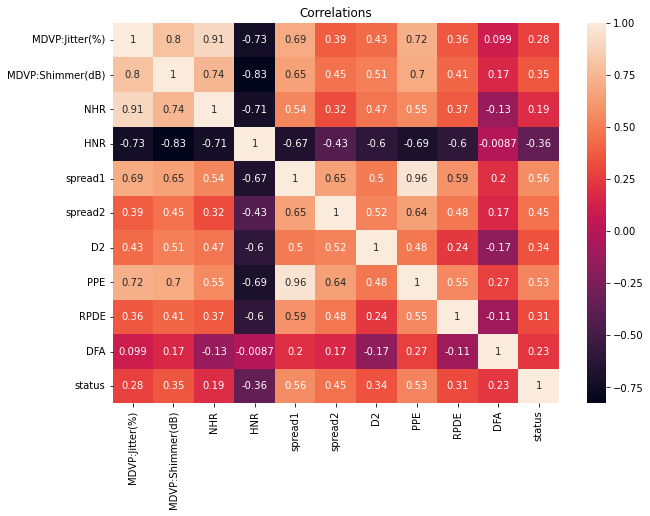

In [41]:
fig = plt.figure(figsize=(10,7))

sns.heatmap(
    (df_subset.corr()), 
    annot=True
)
plt.title('Correlations');

####  MDVP:Jitter(%) & MDVP:Shimmer(dB)

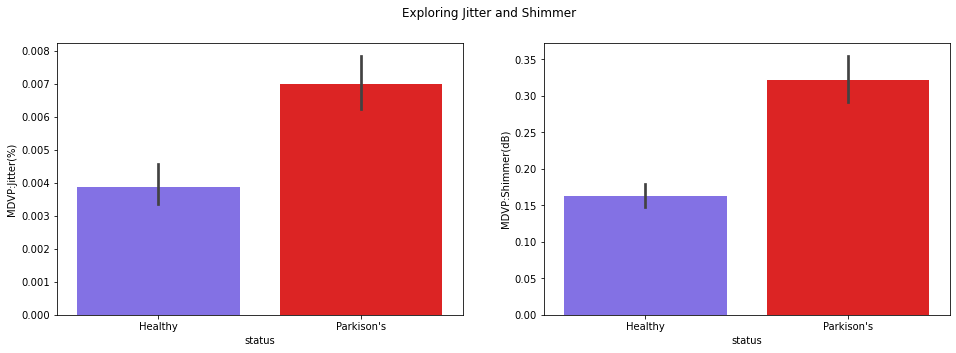

In [42]:
fig,axes = plt.subplots(1,2, sharex=True,figsize=(16,5))
fig.suptitle("Exploring Jitter and Shimmer")
sns.barplot(ax=axes[0],data=df_subset,x="status",y='MDVP:Jitter(%)', palette=['#765ef7','#fb0505'])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Healthy',"Parkison's"])
sns.barplot(ax=axes[1],data=df_subset,x="status",y='MDVP:Shimmer(dB)', palette=['#765ef7','#fb0505'])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Healthy',"Parkison's"]);

We can see there is increased Jitter(%) and Shimmer(dB) in person's with PD. This increase maybe as a result of the disruption in the regularity of vocal fold vibration.

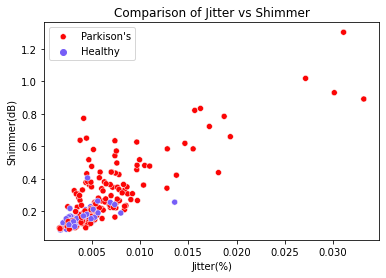

In [43]:
sns.scatterplot(data=df_subset, x='MDVP:Jitter(%)', y='MDVP:Shimmer(dB)', hue='status',palette=['#765ef7','#fb0505'])
plt.title('Comparison of Jitter vs Shimmer')
plt.legend(labels=['Parkison\'s','Healthy'])
plt.xlabel('Jitter(%)')
plt.ylabel('Shimmer(dB)');

### Noise to tonal components : NHR & HNR

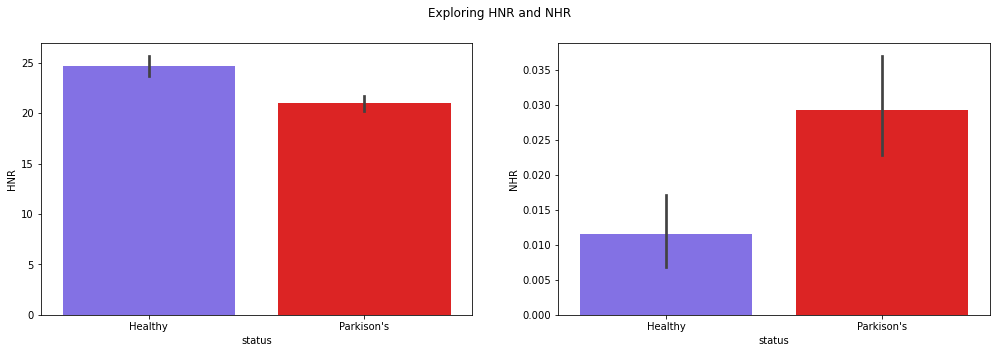

In [44]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(17,5))
fig.suptitle('Exploring HNR and NHR')
sns.barplot(ax=axes[0],data=df,x="status",y='HNR', palette=['#765ef7','#fb0505'])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Healthy',"Parkison's"])
sns.barplot(ax=axes[1],data=df,x="status",y='NHR', palette=['#765ef7','#fb0505'])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Healthy',"Parkison's"]);

A lower NHR(Noise/Harmonic Ratio) and higher HNR(Harmonic/Noise Ratio) indicates a good voice quality. From the visualizations we can see that people with PD have a higher NHR and a lower HNR.

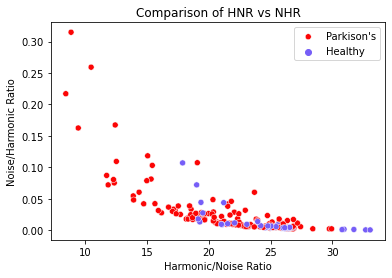

In [45]:
sns.scatterplot(data=df_subset, x='HNR', y='NHR', hue='status',palette=['#765ef7','#fb0505'])
plt.title('Comparison of HNR vs NHR')
plt.legend(labels=['Parkison\'s','Healthy'])
plt.xlabel('Harmonic/Noise Ratio')
plt.ylabel('Noise/Harmonic Ratio');

### Futher exploration of other Measurements

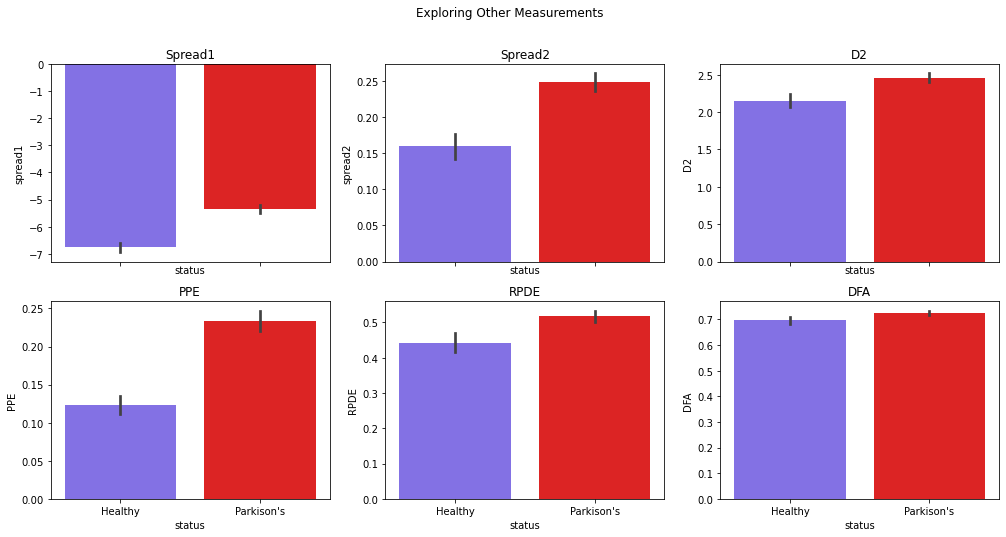

In [46]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(17,8))
fig.suptitle('Exploring Other Measurements')
sns.barplot(ax=axes[0,0],data=df,x="status",y='spread1', palette=['#765ef7','#fb0505'])
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Healthy',"Parkison's"])
axes[0,0].set_title("Spread1")
sns.barplot(ax=axes[0,1],data=df,x="status",y='spread2', palette=['#765ef7','#fb0505'])
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(['Healthy',"Parkison's"])
axes[0,1].set_title("Spread2")
sns.barplot(ax=axes[0,2],data=df,x="status",y='D2', palette=['#765ef7','#fb0505'])
axes[0,2].set_xticks([0,1])
axes[0,2].set_xticklabels(['Healthy',"Parkison's"])
axes[0,2].set_title("D2")
sns.barplot(ax=axes[1,0],data=df,x="status",y='PPE', palette=['#765ef7','#fb0505'])
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['Healthy',"Parkison's"])
axes[1,0].set_title("PPE")
sns.barplot(ax=axes[1,1],data=df,x="status",y='RPDE', palette=['#765ef7','#fb0505'])
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['Healthy',"Parkison's"])
axes[1,1].set_title("RPDE")
sns.barplot(ax=axes[1,2],data=df,x="status",y='DFA', palette=['#765ef7','#fb0505'])
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['Healthy',"Parkison's"])
axes[1,2].set_title("DFA");

# Split

### Preprocessing

In [47]:
#Choose some of measurements
X = df_subset.drop(columns='status')
y = df['status']

In [48]:
X.head(7)

,MDVP:Jitter(%),MDVP:Shimmer(dB),NHR,HNR,spread1,spread2,D2,PPE,RPDE,DFA
0,0.00784,0.426,0.02211,21.033,-4.813031,0.266482,2.301442,0.284654,0.414783,0.815285
1,0.00968,0.626,0.01929,19.085,-4.075192,0.335590,2.486855,0.368674,0.458359,0.819521
2,0.01050,0.482,0.01309,20.651,-4.443179,0.311173,2.342259,0.332634,0.429895,0.825288
3,0.00997,0.517,0.01353,20.644,-4.117501,0.334147,2.405554,0.368975,0.434969,0.819235
4,0.01284,0.584,0.01767,19.649,-3.747787,0.234513,2.332180,0.410335,0.417356,0.823484
5,0.00968,0.456,0.01222,21.378,-4.242867,0.299111,2.187560,0.357775,0.415564,0.825069
6,0.00333,0.140,0.00607,24.886,-5.634322,0.257682,1.854785,0.211756,0.596040,0.764112


### Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

We will be using a Zero Rule Classifier. This classifies to the largest class.

In [50]:
#Implementing zero rule classifier
def zero_rule_algo(train, test):
    output_values = [row for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

predictions = zero_rule_algo(y_train, y_test)
score = accuracy_score(y_test,predictions)

print(f'Accuracy score for our baseline model is {round(score * 100, 4)}')

Accuracy score for our baseline model is 82.0513


## Models

### Logistic Regression

In [51]:
#Initialize model
lr = LogisticRegression(random_state=42, max_iter=1000)

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)
accuracy_score(predictions, y_test)

0.9230769230769231

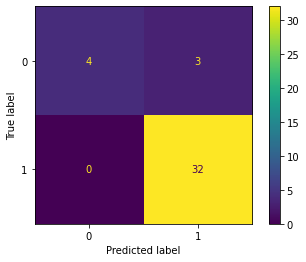

In [52]:
ConfusionMatrixDisplay.from_estimator(lr, X_test,y_test);

In [53]:
# Print classification report
report = pd.DataFrame(classification_report(y_test, lr.predict(X_test), output_dict=True))
report = report.rename(columns={"0":"Healthy","1":"Parkinson's"})
report.T

,precision,recall,f1-score,support
Healthy,1.000000,0.571429,0.727273,7.000000
Parkinson's,0.914286,1.000000,0.955224,32.000000
accuracy,0.923077,0.923077,0.923077,0.923077
macro avg,0.957143,0.785714,0.841248,39.000000
weighted avg,0.929670,0.923077,0.914310,39.000000


### Decision Tree

In [54]:
DTC = DecisionTreeClassifier(random_state=42)

DTC.fit(X_train,y_train)

predictions = DTC.predict(X_test)

accuracy_score(predictions, y_test)

0.9743589743589743

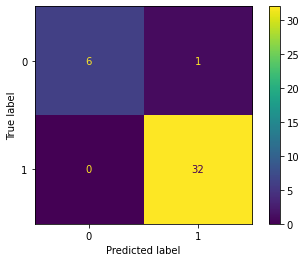

In [55]:
ConfusionMatrixDisplay.from_estimator(DTC, X_test,y_test);

In [56]:
# Print classification report
report = pd.DataFrame(classification_report(y_test, DTC.predict(X_test), output_dict=True))
report = report.rename(columns={ "0": "Healthy","1": "Parkinson's" })
report.T

,precision,recall,f1-score,support
Healthy,1.000000,0.857143,0.923077,7.000000
Parkinson's,0.969697,1.000000,0.984615,32.000000
accuracy,0.974359,0.974359,0.974359,0.974359
macro avg,0.984848,0.928571,0.953846,39.000000
weighted avg,0.975136,0.974359,0.973570,39.000000


#### ROC Curve

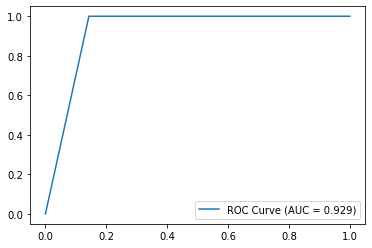

In [57]:
probability = DTC.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probability[:,1])

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr ,label=f'ROC Curve (AUC = {round(roc_auc, 3)})')
plt.legend();

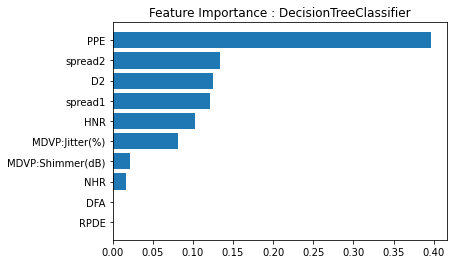

In [58]:
#Check how different features affected out model predictions.
sorted_idx = DTC.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], DTC.feature_importances_[sorted_idx])
plt.title(f'Feature Importance : DecisionTreeClassifier');